In [1]:
import pImpactR as impact
import matplotlib.pyplot as plt
np = impact.np

In [2]:
beam,lattice = impact.readInputFile('test.Chad.in')

for item in lattice:
    if item.type == 'RFkick':
        item.vmax = 0.0
        
for item in lattice:
    if 'length' in item:
        item.n_sckick = int(np.ceil(item.length*50))
        item.n_map = 1
    if item.type == 'nonlinear_insert':
        item.type = 'drift'

reading ImpactZ input file (test.Chad.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [3]:
beam.distribution.alfx = 3.860846841e-5
beam.distribution.betx = 0.561065822
beam.distribution.alfy = 2.282987698e-9
beam.distribution.bety = 1.385141718
beam.distribution.betz  = 200
beam.distribution.alfz  = 0.0
beam.distribution.distribution_type = 'Gauss'
beam.n_particles = 64*32*10
beam.nCore_y = 4
beam.nCore_z = 4

ke = beam.kinetic_energy
mass = beam.mass
g = (ke+mass)/mass
bg = np.sqrt(g*g-1)

In [4]:
beam.distribution.emitx = 1.0e-12
beam.distribution.emity = 1.0e-12
impact.writeInputFile(beam,lattice)
impact.run(beam)

0

In [5]:
d24_smallE = np.loadtxt('fort.24')
d25_smallE = np.loadtxt('fort.25')
!rm fort.24 fort.25

In [6]:
beam.distribution.mode = 'twiss'
beam.distribution.alfx = 3.860846841e-5
beam.distribution.betx = 0.561065822
beam.distribution.alfy = 2.282987698e-9
beam.distribution.bety = 1.385141718
beam.distribution.betz  = 200
beam.distribution.alfz  = 0.0

In [7]:
beam.distribution.emitx = 2.4e-7
beam.distribution.emity = 2.4e-7
beam.distribution.emitz = 0
impact.writeInputFile(beam,lattice)
impact.run(beam)

0

In [8]:
d24_largeE = np.loadtxt('fort.24')
d25_largeE = np.loadtxt('fort.25')
!rm fort.24 fort.25

In [9]:
beam.distribution.mode = 'twiss'
beam.distribution.alfx = 3.860846841e-5
beam.distribution.betx = 0.561065822
beam.distribution.alfy = 2.282987698e-9
beam.distribution.bety = 1.385141718
beam.distribution.betz  = 200
beam.distribution.alfz  = 0.0

In [10]:
eSpread = 2.0e-3
beam.distribution.emitx = 2.4e-7
beam.distribution.emity = 2.4e-7
beam.distribution.betz = 200
beam.distribution.emitz = (eSpread*ke*1.0e-6)**2*beam.distribution.betz
impact.writeInputFile(beam,lattice)
impact.run(beam)

0

In [11]:
d24_eSpread = np.loadtxt('fort.24')
d25_eSpread = np.loadtxt('fort.25')
!rm fort.24 fort.25

In [12]:
madx = np.loadtxt('twiss.madx.txt')

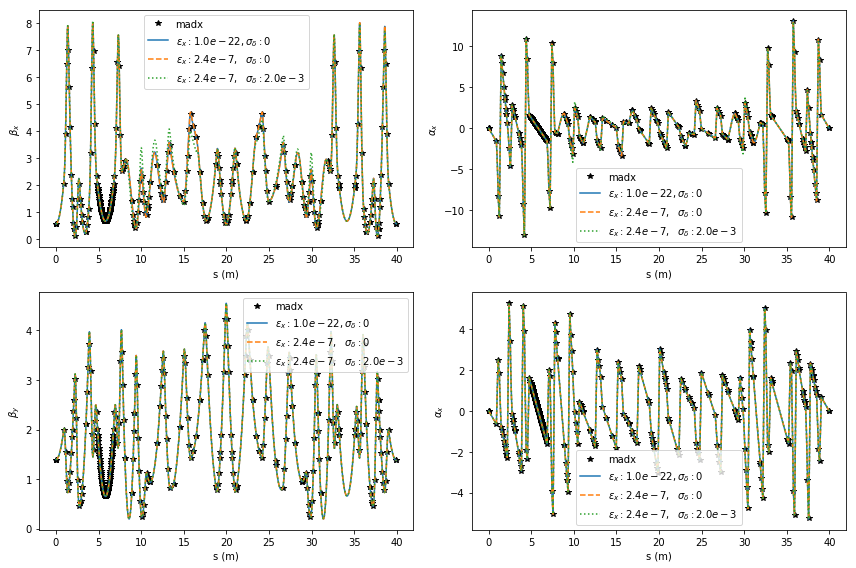

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(madx[:,0],madx[:,2],'k*')
plt.plot(d24_smallE[:,0],d24_smallE[:,2]**2/d24_smallE[:,6]*bg)
plt.plot(d24_largeE[:,0],d24_largeE[:,2]**2/d24_largeE[:,6]*bg,'--')
plt.plot(d24_eSpread[:,0],d24_eSpread[:,2]**2/d24_eSpread[:,6]*bg,':')
plt.legend(['madx',
            r'$\epsilon_x:1.0e-22, \sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:2.0e-3$'])
plt.xlabel('s (m)')
plt.ylabel(r'$\beta_x$')
plt.subplot(2,2,2)
plt.plot(madx[:,0],madx[:,1],'k*')
plt.plot(d24_smallE[:,0],d24_smallE[:,5])
plt.plot(d24_largeE[:,0],d24_largeE[:,5],'--')
plt.plot(d24_eSpread[:,0],d24_eSpread[:,5],':')
plt.xlabel('s (m)')
plt.ylabel(r'$\alpha_x$')
plt.legend(['madx',
            r'$\epsilon_x:1.0e-22, \sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:2.0e-3$'])
plt.subplot(2,2,3)
plt.plot(madx[:,0],madx[:,4],'k*')
plt.plot(d25_smallE[:,0],d25_smallE[:,2]**2/d25_smallE[:,6]*bg)
plt.plot(d25_largeE[:,0],d25_largeE[:,2]**2/d25_largeE[:,6]*bg,'--')
plt.plot(d25_eSpread[:,0],d25_eSpread[:,2]**2/d25_eSpread[:,6]*bg,':')
plt.legend(['madx',
            r'$\epsilon_x:1.0e-22, \sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:2.0e-3$'])
plt.xlabel('s (m)')
plt.ylabel(r'$\beta_y$')
plt.subplot(2,2,4)
plt.plot(madx[:,0],madx[:,3],'k*')
plt.plot(d25_smallE[:,0],d25_smallE[:,5])
plt.plot(d25_largeE[:,0],d25_largeE[:,5],'--')
plt.plot(d25_eSpread[:,0],d25_eSpread[:,5],':')
plt.xlabel('s (m)')
plt.ylabel(r'$\alpha_x$')
plt.legend(['madx',
            r'$\epsilon_x:1.0e-22, \sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:0$',
            r'$\epsilon_x:2.4e-7,\,\,\,\,\sigma_\delta:2.0e-3$'])
plt.tight_layout()

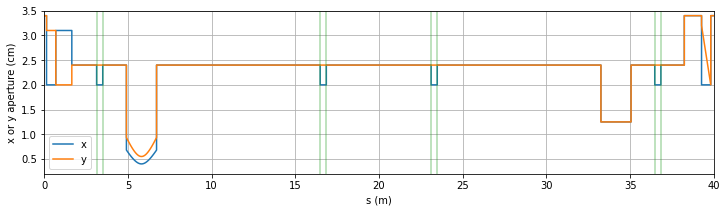

In [14]:
aperture = np.loadtxt('pipeinfo.in')
plt.figure(figsize=(12,3))
plt.plot(aperture[:,0],aperture[:,1]*100)
plt.plot(aperture[:,0],aperture[:,2]*100)
plt.plot(aperture[:,0],(aperture[:,3]-1)*10,alpha=0.4)
plt.grid()
plt.ylim((0.2,3.5))
plt.xlim((0.0, 40))
plt.legend(('x','y'))
plt.xlabel('s (m)')
plt.ylabel('x or y aperture (cm)');

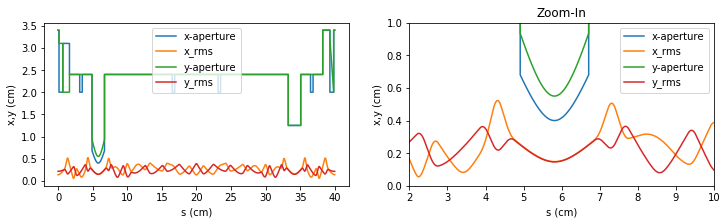

In [32]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(aperture[:,0],aperture[:,1]*100)
plt.plot(d24_eSpread[:,0],d24_eSpread[:,2]*100)
plt.plot(aperture[:,0],aperture[:,2]*100)
plt.plot(d25_eSpread[:,0],d25_eSpread[:,2]*100)
plt.xlabel('s (cm)')
plt.ylabel('x,y (cm)')
plt.legend(['x-aperture','x_rms','y-aperture','y_rms'])
plt.subplot(1,2,2)
plt.plot(aperture[:,0],aperture[:,1]*100)
plt.plot(d24_eSpread[:,0],d24_eSpread[:,2]*100)
plt.xlim(2,10)
plt.ylim(0,0.01)
plt.plot(aperture[:,0],aperture[:,2]*100)
plt.plot(d25_eSpread[:,0],d25_eSpread[:,2]*100)
plt.xlim(2,10)
plt.ylim(0,1)
plt.title('Zoom-In')
plt.xlabel('s (cm)')
plt.ylabel('x,y (cm)')
plt.legend(['x-aperture','x_rms','y-aperture','y_rms'])